# Project: **Disproportionate Effect of COVID-19 on BAME Population in the UK**
## Prepared By: Marisa Dinko, Isha Gangal, Pranitha Maddi, Zetao Wang
## Prepared For: Professor Qi (CS 4774)

#### December 6, 2020
---


In [ ]:
# Import necessary modules
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn import linear_model
from sklearn.decomposition import PCA

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip data files
!unzip '/content/drive/My Drive/ColabNotebooks/ML_Final_data_sets.zip'  # provide full path

Archive:  /content/drive/My Drive/ColabNotebooks/ML_Final_data_sets.zip
  inflating: explain_pop_norm.csv    
  inflating: clean_furlough_data.csv  
  inflating: clean_ethnicity_2011.csv  
  inflating: clean_ons_deaths.csv    
  inflating: Daily_Hospital_Deaths_By_Region.csv  
  inflating: Covid_Deaths_By_Ethnicity.csv  
  inflating: clean_population_est_data.csv  
  inflating: Weekly_Hospital_Deaths_by_Ethnicity.csv  
  inflating: clean_deprivation_data.csv  
  inflating: clean_ethnicity_2011.xlsx  


## 1. Why our project?
Covid-19 has affected the lives of people globally, but has disproportionately impacted BIPOC communities.  In America, we have seen the intersection between issues of race, healthcare, and access to resources influencing the ways that COVID-19 affects populations. The prevalence of these issues has become even more public as the Black Lives Matter movement surged in the summer of 2020. While the United States has its own specific history related to race and inequality, this is a phenomena not unique to our nation. As we begin to explore issues of COVID-19, we want to analyze the role that race and ethnicity play in experiences of health and safety globally as well.

## 2. What was our project?
Our analysis consists of 2 main segments:


1.   A series of visualizations designed to provide pairwise comparisons of important features from our data 
2.   A series of regressions conducted on two datasets, one granular and one summary-level, designed to test the effectiveness of demographic data in predicting Covid-19 death rates

In [ ]:
# Method to read in the clean data
def readClean(dataPath):
  data = pd.read_csv(dataPath, header=0)
  column_names = data.columns.values
  return data, column_names

# Path to all necessary files
death_csv = './clean_ons_deaths.csv'
ethnicity_csv = './clean_ethnicity_2011.csv'
ethnicity_xlsx = './clean_ethnicity_2011.xlsx'
furlough_csv = './clean_furlough_data.csv'
deprivation_csv = './clean_deprivation_data.csv'
pop_csv = './clean_population_est_data.csv'
summary_csv = './explain_pop_norm.csv'
daily_hos_deaths_csv = './Daily_Hospital_Deaths_By_Region.csv'
weekly_hos_deaths_csv = './Weekly_Hospital_Deaths_by_Ethnicity.csv'
death_by_ethn_csv = './Covid_Deaths_By_Ethnicity.csv'

### 1. Visualizations

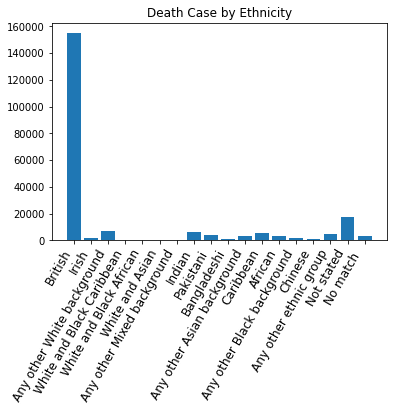

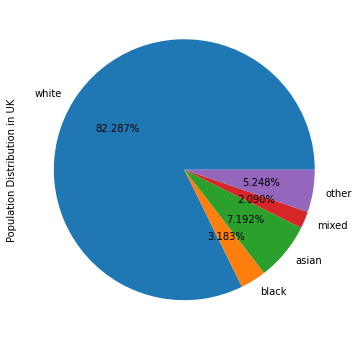

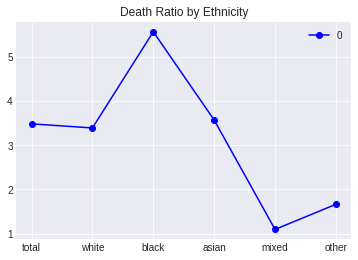

In [ ]:
# Population distribution and deaths by ethnicity
total_death_case = 0
white_death_case = 0
black_death_case = 0
asian_death_case = 0
mixed_death_case = 0
other_death_case = 0

def population_distribution (xlsx,total_death_case, white_death_case, black_death_case, asian_death_case, mixed_death_case, other_death_case):
    total = 0
    white = 0
    black = 0
    asian = 0
    mixed = 0
    other = 0

    df = pd.read_excel(io=xlsx,usecols=[0,1,2,4,7,13,21])

    for i in range(len(df.index)):
        temp_total = df.iloc[i][2]
        temp = 0
        white += df.iloc[i][2]*(df.iloc[i][6]*0.01)
        temp += (df.iloc[i][6])
        black += df.iloc[i][2]*(df.iloc[i][4]*0.01)
        temp += (df.iloc[i][4])
        asian += df.iloc[i][2] * (df.iloc[i][3] * 0.01)
        temp += (df.iloc[i][3])
        mixed += df.iloc[i][2] * (df.iloc[i][5] * 0.01)
        temp += (df.iloc[i][5])
        other += df.iloc[i][6] * (temp-1)
        total += temp_total

    series = pd.Series([white,black,asian,mixed,other], index=['white', 'black', 'asian', 'mixed','other'], name='Population Distribution in UK')
    series.plot.pie(autopct='%.3f%%', fontsize=10, figsize=(6, 6))
    plt.show()

    # style
    plt.style.use('seaborn-darkgrid')

    # create a color palette
    palette = plt.get_cmap('Set1')

    Ratio = [((total_death_case/total)*1000),((white_death_case/white)*1000),((black_death_case/black)*1000),((asian_death_case/asian)*1000),((mixed_death_case/mixed)*1000),((other_death_case/other)*1000)]
    ratio = pd.DataFrame(Ratio, index=['total','white', 'black', 'asian', 'mixed','other'])
    ratio.plot(kind='line', marker='o', color='b', title='Death Ratio by Ethnicity')
    plt.show()

def population_distribution_AND_death_vs_ethicity(csv,xlsx):
    total_death_case = 0
    white_death_case = 0
    black_death_case = 0
    asian_death_case = 0
    mixed_death_case = 0
    other_death_case = 0

    df=pd.read_csv(csv,index_col=0,usecols=[1,2,3,4,5,6,7,8,9,10])
    df['Col_sum'] = df.apply(lambda x: x.sum(), axis=1)

    for i in range(len(df.index)):
        if  0<=i<3 :
            white_death_case += df['Col_sum'][i]
            total_death_case += df['Col_sum'][i]
        elif 3<=i<7 :
            mixed_death_case += df['Col_sum'][i]
            total_death_case += df['Col_sum'][i]
        elif 7<=i<11 or i==14:
            asian_death_case += df['Col_sum'][i]
            total_death_case += df['Col_sum'][i]
        elif 11<=i<14:
            black_death_case += df['Col_sum'][i]
            total_death_case += df['Col_sum'][i]
        elif i==15:
            other_death_case += df['Col_sum'][i]
            total_death_case += df['Col_sum'][i]

    # print(total_death_case,white_death_case,black_death_case,asian_death_case,mixed_death_case ,other_death_case)

    fig, ax = plt.subplots()
    ax.bar(df.index, df['Col_sum'])
    ax.set_xticklabels(df.index,rotation=60,horizontalalignment = 'right', fontsize ='12')
    ax.set_title('Death Case by Ethnicity')
    plt.show()

    population_distribution (xlsx,total_death_case, white_death_case, black_death_case, asian_death_case, mixed_death_case, other_death_case)

population_distribution_AND_death_vs_ethicity(weekly_hos_deaths_csv, ethnicity_xlsx)

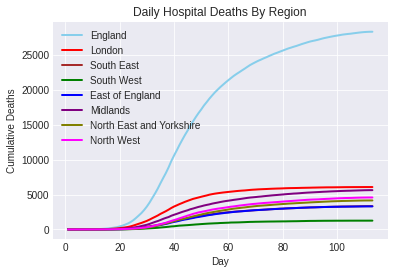

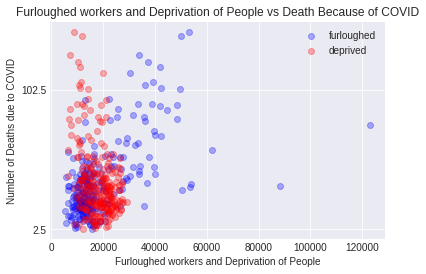

In [ ]:
# Cumulative Covid-19 deaths by region
def location_distribution(file):
    data_df, location_cols = readClean(file)
    england = data_df.loc[0, :][2:]
    london = data_df.loc[1, :][2:]
    s_e = data_df.loc[2, :][2:]
    s_w = data_df.loc[3, :][2:]
    e_eng = data_df.loc[4, :][2:]
    mid = data_df.loc[5, :][2:]
    ne_york = data_df.loc[6, :][2:]
    nw = data_df.loc[7, :][2:]

    df = pd.DataFrame({'x': range(1, 115), 'England': england, 'London': london, 'South East': s_e, 'South West': s_w,
                       'East of England': e_eng, 'Midlands': mid, 'North East and Yorkshire': ne_york, 'North West': nw})
    # multiple line plot
    plt.plot('x', 'England', data=df, marker='', color='skyblue', linewidth=2)
    plt.plot('x', 'London', data=df, marker='', color='red', linewidth=2)
    plt.plot('x', 'South East', data=df, marker='', color='brown', linewidth=2)
    plt.plot('x', 'South West', data=df, marker='', color='green', linewidth=2)
    plt.plot('x', 'East of England', data=df, marker='', color='blue', linewidth=2)
    plt.plot('x', 'Midlands', data=df, marker='', color='purple', linewidth=2)
    plt.plot('x', 'North East and Yorkshire', data=df, marker='', color='olive', linewidth=2)
    plt.plot('x', 'North West', data=df, marker='', color='magenta', linewidth=2)
    plt.legend()
    plt.title("Daily Hospital Deaths By Region")
    plt.xlabel("Day")
    plt.ylabel("Cumulative Deaths")
    plt.show()
    return

# Furloughed and deprived vs Covid-19 deaths
def fur_dep_death_scatter(furlough_csv, deprivation_csv, death_csv): #clean_furlough_data, clean_dep
    
    fur = pd.read_csv(furlough_csv, header=0)
    dep = pd.read_csv(deprivation_csv , header=0)
    death = pd.read_csv(death_csv , header=0)
    
    dep = dep.rename(columns={'Local Authority District name (2019)': "Area Name"})
    inter = pd.merge(fur, dep, on = 'Area Name')
    full_df = pd.merge(inter, death, on = 'Area Name')
    
    x = full_df['total_furloughed']
    y = full_df['IMD_rank_avg']
    z = full_df['covid_Rate']
    
    zz = []

    for i in range(len(z)): 
        zz.append(float(z[i])) 
        zz = sorted(zz)
    
    plt.scatter(x, z, c='blue', alpha=0.3,cmap='viridis', label='furloughed')
    plt.scatter(y, z, c='red', alpha=0.3,cmap='viridis', label='deprived')
    plt.yticks(np.arange(min(zz), max(zz), 100.0))
    plt.legend()
    plt.title('Furloughed workers and Deprivation of People vs Death Because of COVID')
    plt.xlabel('Furloughed workers and Deprivation of People')
    plt.ylabel('Number of Deaths due to COVID')
    plt.show()
    
    return 
  
location_distribution(daily_hos_deaths_csv)
fur_dep_death_scatter(furlough_csv, deprivation_csv, death_csv)

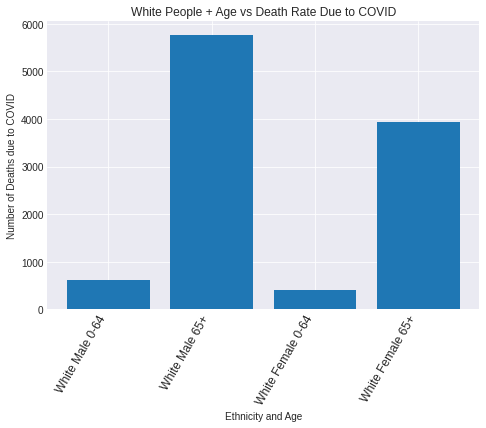

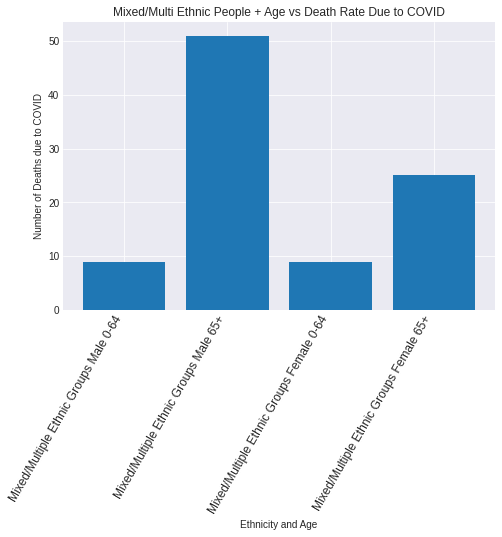

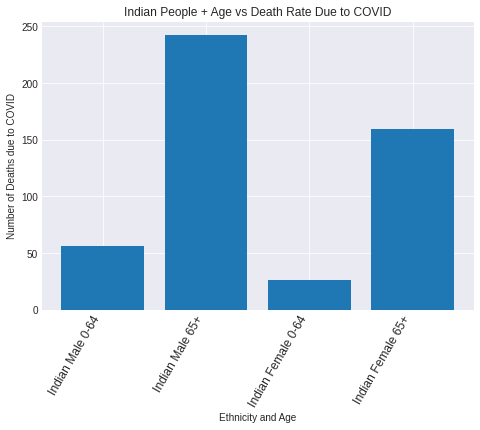

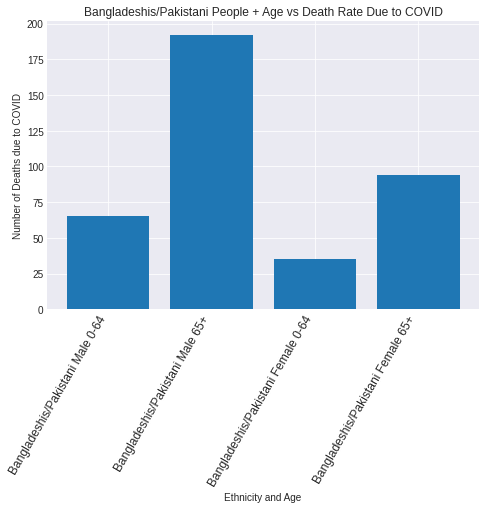

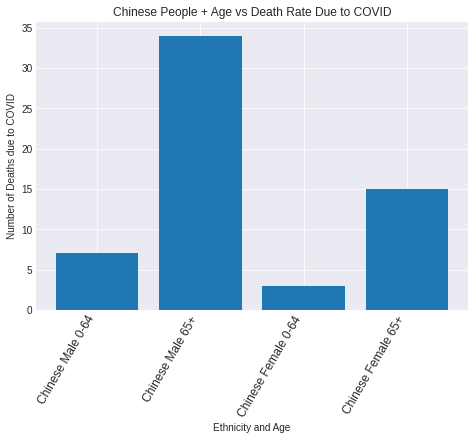

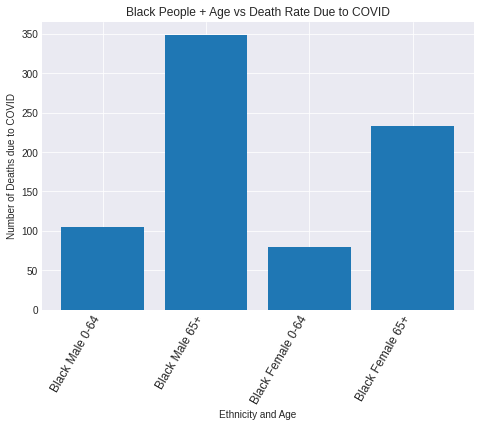

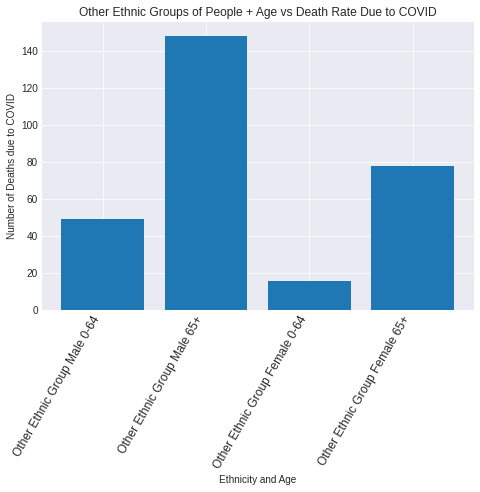

In [ ]:
# Helper method to create plots
def make_plot(data1, data2, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.set_xlabel('Ethnicity and Age')
    ax.set_ylabel('Number of Deaths due to COVID')
    ax.bar(data1,data2)
    ax.set_xticklabels(data1,rotation=60,horizontalalignment = 'right', fontsize ='12')
    plt.show()
    
    return 

# Covid-19 deaths by ethnicity and age group
def eth_age_death(eth_death_csv):
    eth = pd.read_csv(eth_death_csv, header=0)
    one = eth['Ethnicity'] + ' ' + eth['Sex'] + ' ' + eth['AgeGroup']
       
    make_plot(one[0:4],eth['Covid_Related_Deaths'][0:4], 'White People + Age vs Death Rate Due to COVID')
    make_plot(one[4:8],eth['Covid_Related_Deaths'][4:8], 'Mixed/Multi Ethnic People + Age vs Death Rate Due to COVID')
    make_plot(one[8:12],eth['Covid_Related_Deaths'][8:12], 'Indian People + Age vs Death Rate Due to COVID')
    make_plot(one[12:16],eth['Covid_Related_Deaths'][12:16], 'Bangladeshis/Pakistani People + Age vs Death Rate Due to COVID')
    make_plot(one[16:20],eth['Covid_Related_Deaths'][16:20], 'Chinese People + Age vs Death Rate Due to COVID')
    make_plot(one[20:24],eth['Covid_Related_Deaths'][20:24], 'Black People + Age vs Death Rate Due to COVID')
    make_plot(one[24:28],eth['Covid_Related_Deaths'][24:28], 'Other Ethnic Groups of People + Age vs Death Rate Due to COVID')
    
    return 

eth_age_death(death_by_ethn_csv)

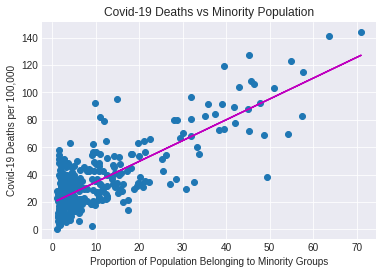

R Squared:  0.6254345303278283


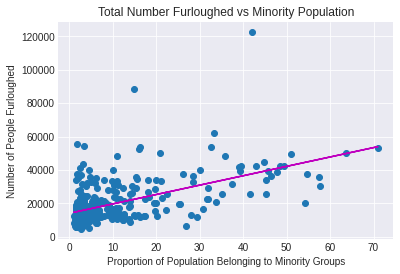

R Squared:  0.305368432052154


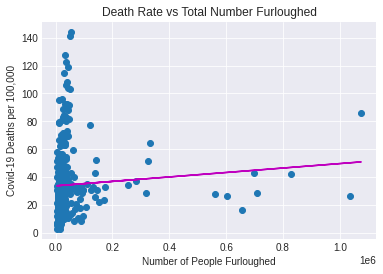

R Squared:  0.006325630888414313


In [ ]:
# Helper method for generating scatter plots with lines of best fit
def makeScatter(x, y, plt_title=None, x_label=None, y_label=None):
  # m, b = np.polyfit(npx, npy, 1)
  # print(m, b)
  reg_x = np.array(x).reshape((-1,1))
  reg_y = np.array(y).reshape((-1,1))
  reg = linear_model.LinearRegression().fit(reg_x, reg_y)
  pred_y = reg.predict(reg_x)
  
  plt.scatter(x, y)
  plt.plot(x, pred_y, 'm-')
  plt.title(plt_title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  
  plt.show()
  print("R Squared: ", reg.score(reg_x, reg_y))
  return

# Method for scatter plot of ethnicity vs death rate
def ethnicity_deaths_scatter(death_csv, ethnicity_csv):
  death_df, death_cols = readClean(death_csv)
  ethnicity_df, ethnicity_cols = readClean(ethnicity_csv)

  combo_df = death_df.set_index('Area code').join(ethnicity_df.set_index('Geography_code'), how='inner')
  x_pts = combo_df['Non_White']
  y_pts = combo_df['covid_Rate'].astype(float)

  plt_title = "Covid-19 Deaths vs Minority Population"
  x_label = "Proportion of Population Belonging to Minority Groups"
  y_label = "Covid-19 Deaths per 100,000"

  makeScatter(x_pts, y_pts, plt_title, x_label, y_label)
  return

# Method for scatter plot of ethnicity vs percent furloughed
def furlough_BAME_scatter(furlough_csv, ethnicity_csv):
  furlough_df, furlough_cols = readClean(furlough_csv)
  ethnicity_df, ethnicity_cols = readClean(ethnicity_csv)

  combo_df = furlough_df.set_index('Area Code').join(ethnicity_df.set_index('Geography_code'))[["Non_White", "total_furloughed"]]
  combo_df.dropna(inplace=True)
  x_pts = combo_df['Non_White']
  y_pts = combo_df['total_furloughed']

  plt_title = "Total Number Furloughed vs Minority Population"
  x_label = "Proportion of Population Belonging to Minority Groups"
  y_label = "Number of People Furloughed"

  makeScatter(x_pts, y_pts, plt_title, x_label, y_label)
  return

# Method for scatter plot of percent furloughed vs deaths
def furlough_deaths_scatter(furlough_csv, death_csv):
  furlough_df, furlough_cols = readClean(furlough_csv)
  death_df, death_cols = readClean(death_csv)

  combo_df = death_df.set_index('Area code').join(furlough_df.set_index('Area Code'), 
                                                  lsuffix='_left', rsuffix='_right', how='inner')[["covid_Rate", "total_furloughed"]]
  combo_df.dropna(inplace=True)
  combo_df.drop(index='E92000001', inplace=True) #outlier
  x_pts = combo_df['total_furloughed']
  y_pts = combo_df['covid_Rate']

  plt_title = "Death Rate vs Total Number Furloughed"
  x_label = "Number of People Furloughed"
  y_label = "Covid-19 Deaths per 100,000"

  makeScatter(x_pts, y_pts, plt_title, x_label, y_label)
  return

ethnicity_deaths_scatter(death_csv, ethnicity_csv)
furlough_BAME_scatter(furlough_csv, ethnicity_csv)
furlough_deaths_scatter(furlough_csv, death_csv)

### 2. Regressions

In [ ]:
# Linear Regression
def linReg(x, y):

  score = 0
  nfolds = 5

  kfold = sk.model_selection.KFold(nfolds,True)
  scaler = sk.preprocessing.StandardScaler()
  for train, test in kfold.split(x):
    xtrain_orig = x[train]
    ytrain = y[train]
    xtest_orig = x[test]
    ytest = y[test]
    
    scaler.fit(xtrain_orig)
    xtrain = scaler.transform(xtrain_orig)
    xtest = scaler.transform(xtest_orig)

    reg = linear_model.LinearRegression().fit(xtrain, ytrain)
    score += reg.score(xtest, ytest)
  CV_acc = score / nfolds

  return CV_acc

# Lasso Regression
def lassoReg(x, y):
  nfolds = 5
  best_score = 0
  best_alpha = 0
  alphas = [0.1, 0.25, 0.5, 1]
  CV_scores = []

  kfold = sk.model_selection.KFold(nfolds, True)
  scaler = sk.preprocessing.StandardScaler()
  for alp in alphas:
    score = 0
    for train, test in kfold.split(x):
      xtrain_orig = x[train]
      ytrain = y[train]
      xtest_orig = x[test]
      ytest = y[test]

      scaler.fit(xtrain_orig)
      xtrain = scaler.transform(xtrain_orig)
      xtest = scaler.transform(xtest_orig)

      reg = linear_model.Lasso(max_iter=100000, alpha=alp).fit(xtrain, ytrain)
      score += reg.score(xtest, ytest)
    CV_acc = score / nfolds
    CV_scores.append(CV_acc)
    if CV_acc > best_score:
      best_alpha = alp
      best_score = CV_acc
  # print(CV_scores)
  # print(best_alpha)
  return best_score

# Ridge Regression
def ridgeReg(x, y):  
  nfolds = 5
  best_score = 0
  best_alpha = 0
  alphas = [0.1, 0.25, 0.5, 1]
  CV_scores = []

  kfold = sk.model_selection.KFold(nfolds, True)
  scaler = sk.preprocessing.StandardScaler()
  for alp in alphas:
    score = 0
    for train, test in kfold.split(x):
      xtrain_orig = x[train]
      ytrain = y[train]
      xtest_orig = x[test]
      ytest = y[test]

      scaler.fit(xtrain_orig)
      xtrain = scaler.transform(xtrain_orig)
      xtest = scaler.transform(xtest_orig)

      reg = linear_model.Ridge(alpha=alp).fit(xtrain, ytrain)
      score += reg.score(xtest, ytest)
    CV_acc = score / nfolds
    CV_scores.append(CV_acc)
    if CV_acc > best_score:
      best_alpha = alp
      best_score = CV_acc
  # print(CV_scores)
  # print(best_alpha)
  return best_score

# PCA Regression
def pcaReg(x, y, reg_type):
  num_pc = [2, 5, 10, 25, 50, 75, 100, 123]
  pc_nums_x = []
  nfolds = 5
  best_score = 0
  best_pc = 0
  CV_scores = []

  kfold = sk.model_selection.KFold(nfolds, True)
  scaler = sk.preprocessing.StandardScaler()
  for num in num_pc:
    score = 0
    for train, test in kfold.split(x):
      xtrain_orig = x[train]
      ytrain = y[train]
      xtest_orig = x[test]
      ytest = y[test]

      scaler.fit(xtrain_orig)
      xtrain = scaler.transform(xtrain_orig)
      xtest = scaler.transform(xtest_orig)

      pca = PCA(n_components=num).fit(xtrain)
      xtrain_pca = pca.transform(xtrain)
      xtest_pca = pca.transform(xtest)

      if reg_type=='linear':
        reg = linear_model.LinearRegression().fit(xtrain_pca, ytrain)
      elif reg_type=='lasso':
        reg = linear_model.Lasso().fit(xtrain_pca, ytrain)
      else:
        reg = linear_model.Ridge().fit(xtrain_pca, ytrain)
      score += reg.score(xtest_pca, ytest)
    CV_acc = score / nfolds
    pc_nums_x.append('pc='+str(num))
    CV_scores.append(CV_acc)
    if CV_acc > best_score:
      best_score = CV_acc
      best_pc = num

  # print(CV_scores)
  pca_fig = plt.figure()
  ax = pca_fig.add_axes([0,0,1,1])
  ax.set_title('Regression with PCA - CV Accuracy')
  ax.set_ylabel('Accuracy')
  ax.bar(pc_nums_x, CV_scores)
  plt.show()

  return best_score



#### 2.1 Granular Dataset and PCA

Linear regression accuracy (granular):  0.601154273078568
Lasso regression accuracy (granular):  0.7390438138875931
Ridge regression accuracy (granular):  0.7271466229367667


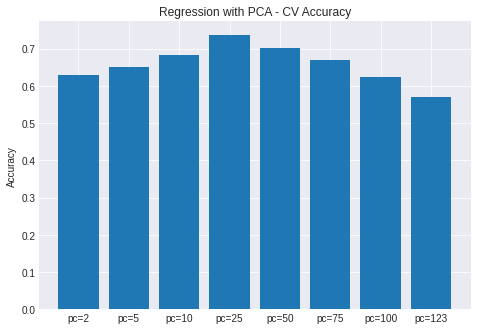

Linear regression accuracy (PCA):  0.7363211287399876


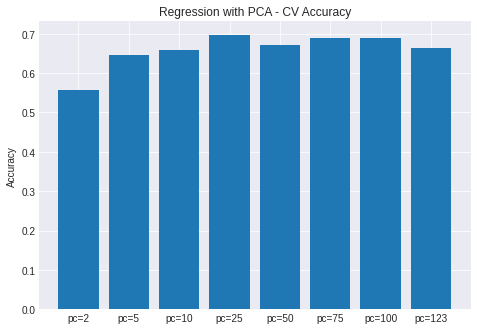

Lasso regression accuracy (PCA):  0.6964467475520467


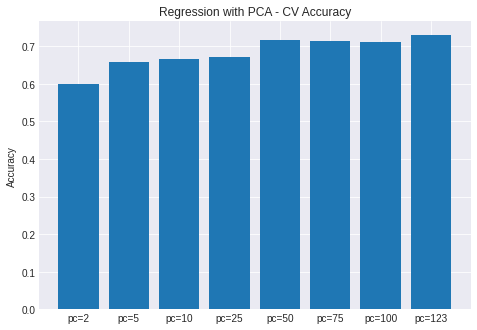

Ridge regression accuracy (PCA):  0.7298547917914703


In [ ]:
# Load and format granular datasheets
def formatData(death_csv, furlough_csv, ethnicity_csv, pop_csv):
  # Load relevant data
  death_df, death_cols = readClean(death_csv)
  furlough_df, furlough_cols = readClean(furlough_csv)
  ethnicity_df, ethnicity_cols = readClean(ethnicity_csv)
  pop_df, pop_cols = readClean(pop_csv)

  # Adding age brackets for normalized population measure
  pop_df['<20'] = pop_df.iloc[:, 4:24].sum(axis=1) / pop_df['All ages']
  pop_df['20-39'] = pop_df.iloc[:, 24:44].sum(axis=1) / pop_df['All ages']
  pop_df['40-59'] = pop_df.iloc[:, 44:64].sum(axis=1) / pop_df['All ages']
  pop_df['60-79'] = pop_df.iloc[:, 64:84].sum(axis=1) / pop_df['All ages']
  pop_df['80+'] = pop_df.iloc[:, 84:-1].sum(axis=1) / pop_df['All ages']

  # Combining data sources
  combo1_df = pd.merge(death_df, ethnicity_df, left_on='Area code', right_on='Geography_code', how='inner')
  combo2_df = pd.merge(combo1_df, furlough_df, left_on='Area code', right_on='Area Code', how='inner')
  all_df = pd.merge(combo2_df, pop_df, left_on='Area code', right_on='Code', how='inner')
  # print(all_df.columns.values, all_df.shape)

  # Removing duplicate and unnecessary columns
  cleaned_df = all_df.drop(columns=['Sex', 'covid Lower CI', 'covid Upper CI', 'covid_Deaths', 
                                    'all_Deaths', 'all_Rate', 'all Lower CI', 'all Upper CI',
                                    'Geography_code', 'Geography_name', 'Area Name_y', 
                                    'Area Code', 'Code', 'Name', 'Geography1']).set_index('Area code')
  # print(cleaned_df.columns.values, cleaned_df.shape)
  cleaned_y = cleaned_df['covid_Rate']
  cleaned_x = cleaned_df.drop(columns='covid_Rate')

  x = np.array(cleaned_x.iloc[:, 2:])
  y = np.array(cleaned_y).reshape((-1,1))

  return x, y

# Granular data
x, y = formatData(death_csv, furlough_csv, ethnicity_csv, pop_csv)
linRegScore = linReg(x,y)
lassoRegScore = lassoReg(x, y)
ridgeRegScore = ridgeReg(x, y)
print("Linear regression accuracy (granular): ", linRegScore)
print("Lasso regression accuracy (granular): ", lassoRegScore)
print("Ridge regression accuracy (granular): ", ridgeRegScore)

# PCA
pcaLinScore = pcaReg(x, y, 'linear') 
print("Linear regression accuracy (PCA): ", pcaLinScore)
pcaLassoScore = pcaReg(x, y, 'lasso')
print("Lasso regression accuracy (PCA): ", pcaLassoScore)
pcaRidgeScore = pcaReg(x, y, 'ridge')
print("Ridge regression accuracy (PCA): ", pcaRidgeScore)

#### 2.2 Summary Dataset

In [ ]:
# Load summary data
def loadSummaryData(summary_csv):
  data_df, data_cols = readClean(summary_csv)

  x = np.array(data_df.drop(columns=['name', 'covid_death_rate', 'all_death_rate']))
  y = np.array(data_df['covid_death_rate']).reshape((-1,1))

  return x, y

# Summary data
x, y = loadSummaryData(summary_csv)
linRegScore = linReg(x,y)
lassoRegScore = lassoReg(x, y)
ridgeRegScore = ridgeReg(x, y)
print("Linear regression accuracy (summary): ", linRegScore)
print("Lasso regression accuracy (summary): ", lassoRegScore)
print("Ridge regression accuracy (summary): ", ridgeRegScore)


Linear regression accuracy (summary):  0.579519819276952
Lasso regression accuracy (summary):  0.5861133724503796
Ridge regression accuracy (summary):  0.5913503859415741
